# 14MAR23 In Class Exercise
Module: Population Differntiation & Demography \
Topic: Demographic inference.

In [1]:
# Import modules.
import demes
import demesdraw
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

__A brief note about scaling in the MSMC.__

Both the estimed rates and times from MSMC are scaled by the mutation rate per basepair per generation. To convert the scaled time to generations one must divide by the mutation rate—ie $\frac{\mu T}{\mu} = generations$—and then if we wanted to further convert time from generations to years we would multiple by the generation time—ie $\frac{\mu T}{\mu} \times generation \; time = years$. To convert the scaled coalescence rates to effective population sizes we first take the invers of the scaled coalesnces rate—ie $\frac{1}{\lambda} = 4 \mu N$—and then dived by the scaled mutation rate—ie $\frac{4 \mu N}{2 \mu} = 2N$.

First let's load the output for the single population results.

In [2]:
# Load the outputs from MSMC.
afr_df = pd.read_csv('../data/AFR.msmc2.final.txt', delim_whitespace=True)
eur_df = pd.read_csv('../data/EUR.msmc2.final.txt', delim_whitespace=True)

Now, let's inspect each of the dataframes.

In [3]:
# Afr.
afr_df

,time_index,left_time_boundary,right_time_boundary,lambda
0,0,0.000000,0.000003,3067.74
1,1,0.000003,0.000008,3067.74
2,2,0.000008,0.000015,2735.26
3,3,0.000015,0.000025,2136.08
4,4,0.000025,0.000038,3530.46
5,5,0.000038,0.000058,2779.87
6,6,0.000058,0.000087,1579.22
7,7,0.000087,0.000127,1335.74
8,8,0.000127,0.000185,1353.82
9,9,0.000185,0.000268,1693.83


In [4]:
# EUR.
eur_df

,time_index,left_time_boundary,right_time_boundary,lambda
0,0,0.000000,0.000002,1923.02
1,1,0.000002,0.000006,1923.02
2,2,0.000006,0.000011,3099.70
3,3,0.000011,0.000018,7000.88
4,4,0.000018,0.000028,12056.00
5,5,0.000028,0.000043,10513.90
6,6,0.000043,0.000064,5010.98
7,7,0.000064,0.000094,2117.59
8,8,0.000094,0.000137,1477.99
9,9,0.000137,0.000198,1404.70


The tables above the first column represents a simple index, the second and third columns represent the scaled start and end time for each time interval, and the last column contains the scaled coalescence rate for that time interval. Now, let's make plot these demographic histories by loading the `demes` yaml files and plotting using `demesdraw`. 

In [5]:
# Load the demes yaml files.
afr_graph = demes.load('../data/AFR.msmc2.final.demes.yaml')
eur_graph = demes.load('../data/EUR.msmc2.final.demes.yaml')

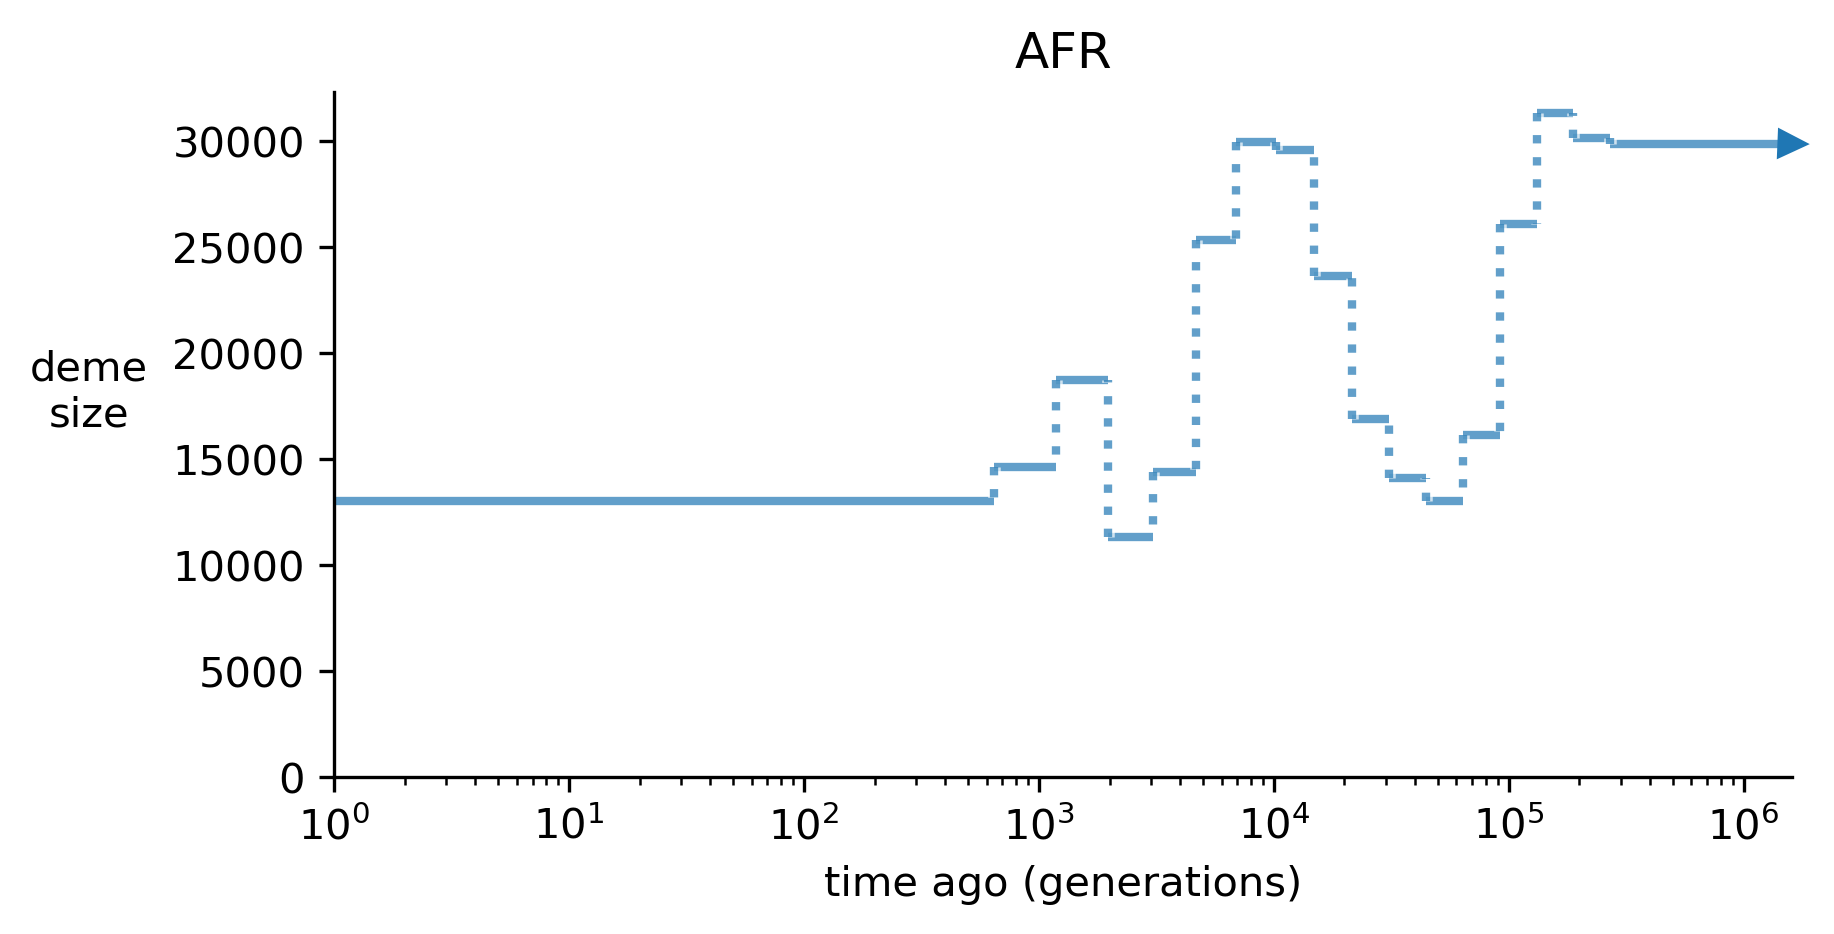

In [6]:
# Intialize the figure.
fig = plt.figure(
    figsize=(6, 3),
    constrained_layout=True,
    dpi=300.0,
)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the demes graph.
demesdraw.size_history(
    afr_graph,
    ax=ax,
    log_time=True,
    title='AFR',
)
# Show the plot.
plt.show()

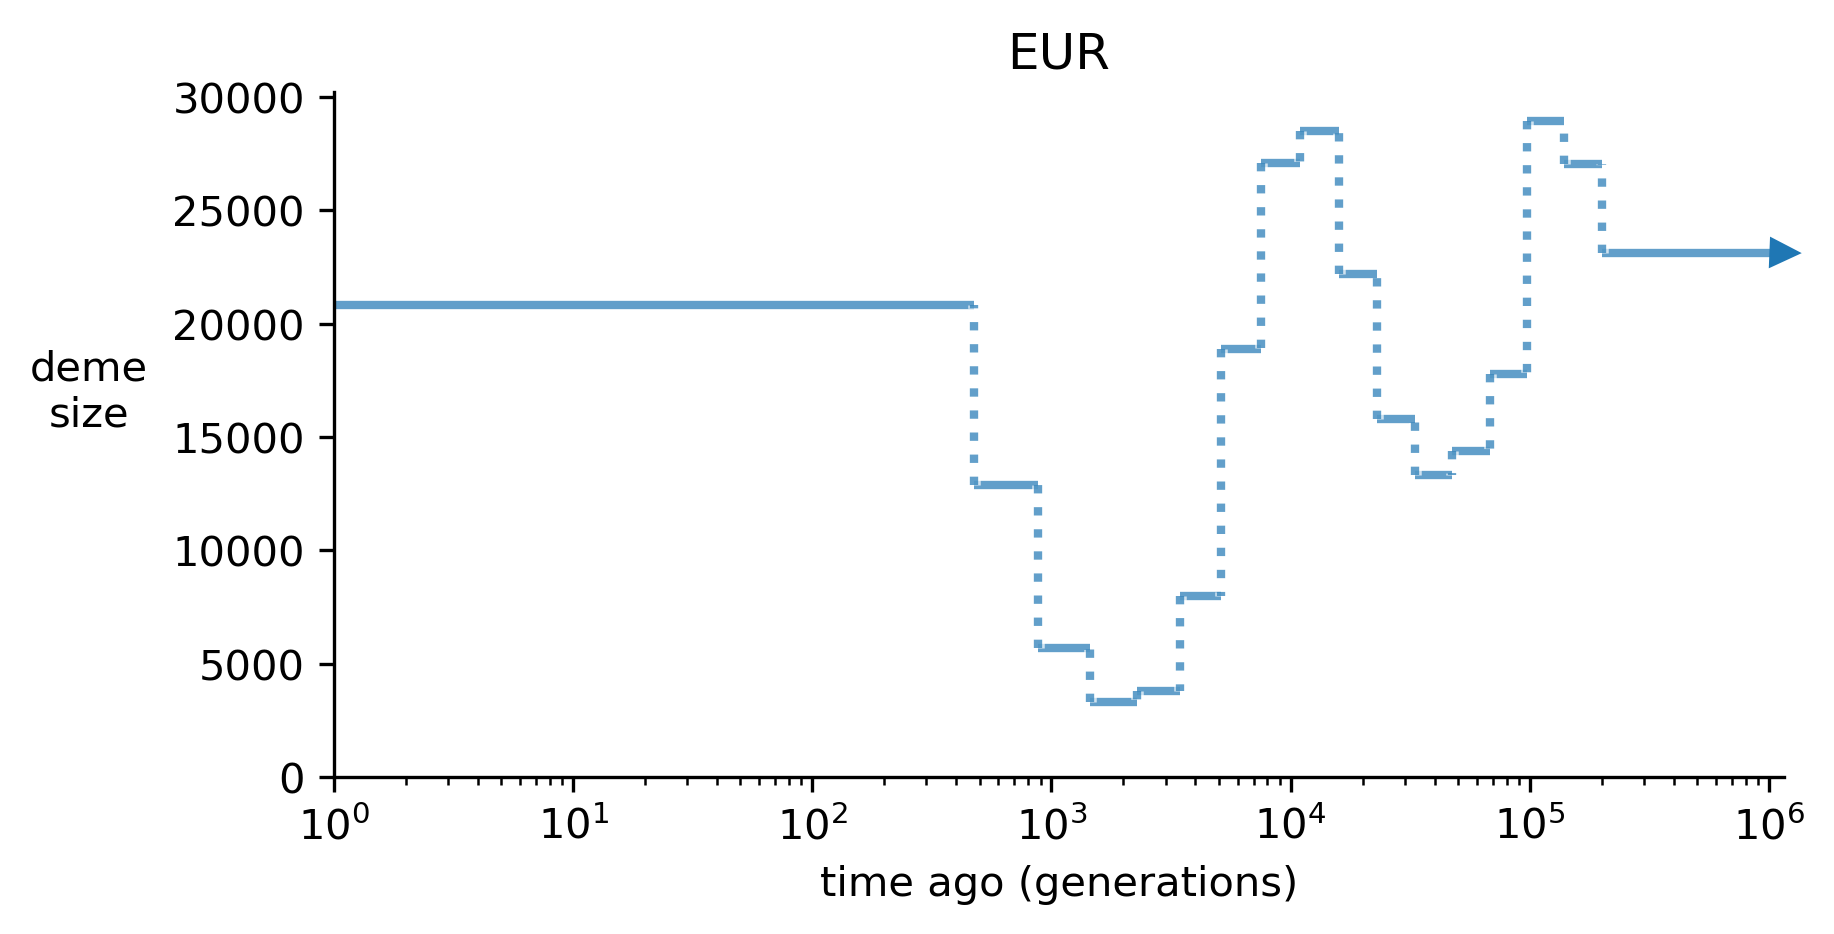

In [7]:
# Intialize the figure.
fig = plt.figure(
    figsize=(6, 3),
    constrained_layout=True,
    dpi=300.0,
)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the demes graph.
demesdraw.size_history(
    eur_graph,
    ax=ax,
    log_time=True,
    title='EUR',
)
# Show the plot.
plt.show()

Note that "deme size" corresponds to the effective population size. What do you notice is different between the demographic history of AFR vs EUR individuals? Think back to what we know about human evolution. Does this make sense? If things are unclear don't fret, let's plot both these demographic histories ourself. First, we need to intialize the mutation rate and generation time inferred from the original paper, such that we can plot!

In [8]:
# Load the output from MSMC.
across_coal_df = pd.read_csv('../data/AFR_EUR.msmc2.final.txt', delim_whitespace=True)
across_coal_df

,time_index,left_time_boundary,right_time_boundary,lambda
0,0,0.000000,0.000004,2.24611
1,1,0.000004,0.000011,2.24611
2,2,0.000011,0.000019,102.27900
3,3,0.000019,0.000032,1575.16000
4,4,0.000032,0.000049,4296.24000
5,5,0.000049,0.000073,2960.15000
6,6,0.000073,0.000106,1829.32000
7,7,0.000106,0.000154,1368.38000
8,8,0.000154,0.000219,1604.05000
9,9,0.000219,0.000312,2193.99000


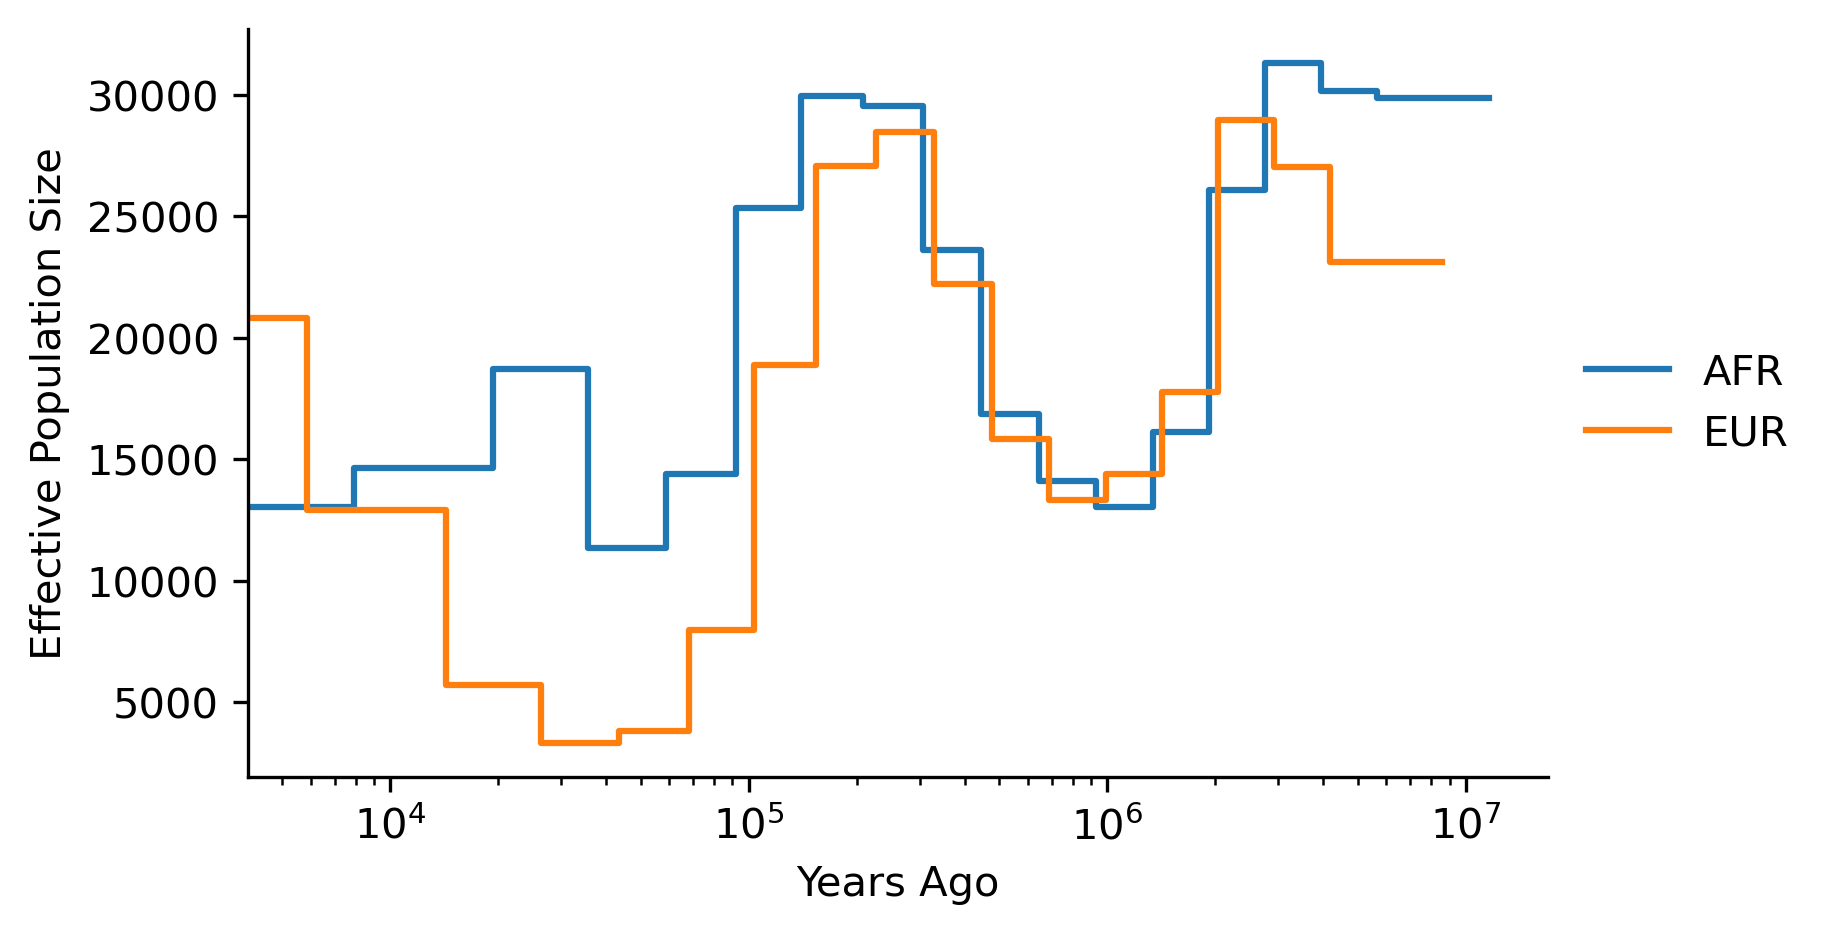

In [9]:
# Intialize the mutation rate and generation time.
mut_rate = 1.25e-8
gen_time = 30
# Intialize the figure.
fig = plt.figure(
    figsize=(6, 3),
    constrained_layout=True,
    dpi=300.0,
)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the MSMC results.
ax.step(
    afr_df['left_time_boundary'].values/mut_rate*gen_time,
    (1/afr_df['lambda'].values)/(2*mut_rate), label='AFR',
)
ax.step(
    eur_df['left_time_boundary'].values/mut_rate*gen_time,
    (1/eur_df['lambda'].values)/(2*mut_rate), label='EUR',
)
# Plot the legend.
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Set the x-axis to log scale time.
ax.set_xscale('log')
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Label the axes.
ax.set_ylabel('Effective Population Size')
ax.set_xlabel('Years Ago')
# Show the plot!
plt.show()

Now, that we plotted the two demographic histories together how would you intepret this plot? What does it mean when the two lines are very similar to one another? What does it mean when the lines are more far apart? Does this make sense given what we know about human evolution? After you have convinced yourself you know what is going let's go ahead and load the relative cross-coalescence rate.

In [10]:
# Load the output from MSMC.
cross_coal_df = pd.read_csv('../data/AFR_EUR.combined.msmc2.final.txt', delim_whitespace=True)

Now, let's inspect the data frame.

In [11]:
# Show the dataframe.
cross_coal_df

,time_index,left_time_boundary,right_time_boundary,lambda_00,lambda_01,lambda_11
0,0,0.000000,0.000004,1923.020,2.24611,3067.740
1,1,0.000004,0.000011,2746.696,2.24611,2934.748
2,2,0.000011,0.000019,7116.274,102.27900,2435.670
3,3,0.000019,0.000032,11747.580,1575.16000,2833.270
4,4,0.000032,0.000049,8863.024,4296.24000,3080.106
5,5,0.000049,0.000073,4142.963,2960.15000,2059.480
6,6,0.000073,0.000106,1925.710,1829.32000,1457.480
7,7,0.000106,0.000154,1456.003,1368.38000,1344.780
8,8,0.000154,0.000219,1523.599,1604.05000,1523.825
9,9,0.000219,0.000312,1946.758,2193.99000,1964.802


So the columns here are the very same as before, with the exception of the fourth column representing the scaled coalescence rate within the first population, the fifth column representing the scaled coalescence rate across populations, and the last column representing the scaled coalescence rate within the second population. Now, lets plot!

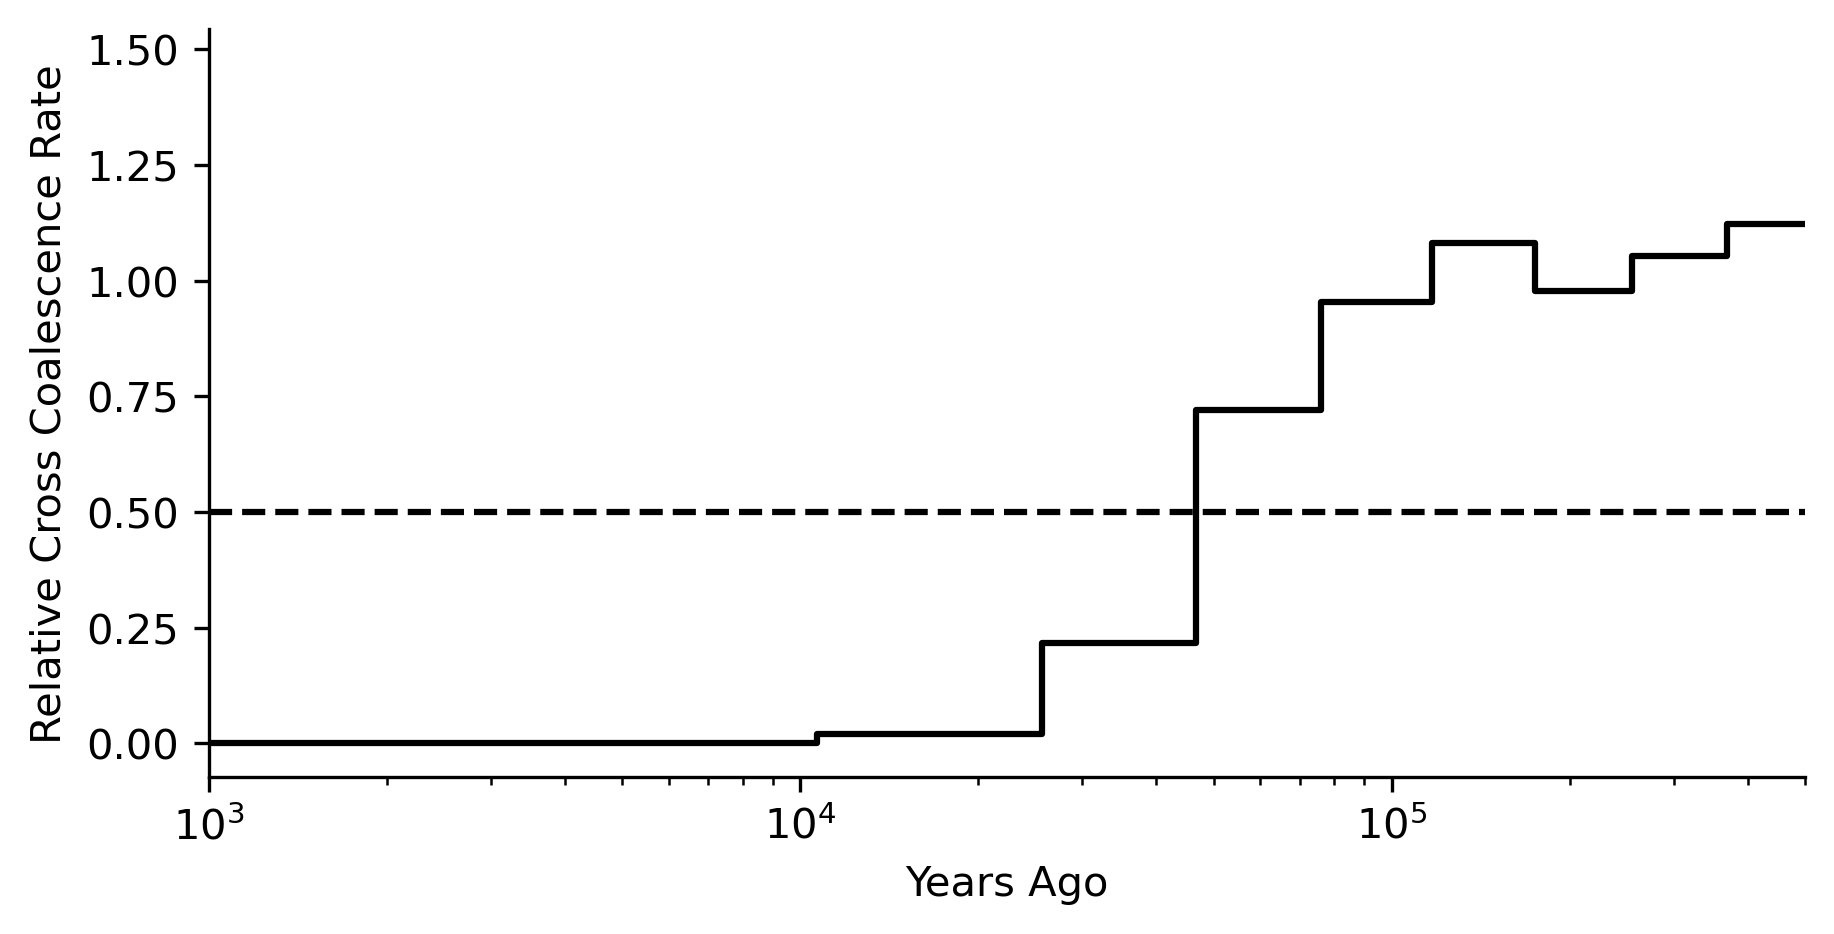

In [12]:
# Intialize the mutation rate and generation time.
mut_rate = 1.25e-8
gen_time = 30
# Intialize the figure.
fig = plt.figure(
    figsize=(6, 3),
    constrained_layout=True,
    dpi=300.0,
)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the MSMC results.
ax.step(
    cross_coal_df['left_time_boundary'].values/mut_rate*gen_time,
    2*cross_coal_df['lambda_01'].values/(cross_coal_df['lambda_00'].values+cross_coal_df['lambda_11'].values),
    color='black',
)
ax.axhline(0.5, color='black', linestyle='dashed')
# Set the x-axis to log scale time.
ax.set_xscale('log')
ax.set_xlim(1000,500000)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Label the axes.
ax.set_ylabel('Relative Cross Coalescence Rate')
ax.set_xlabel('Years Ago')
# Show the plot!
plt.show()

The two populations then became progressively more separated over time, reaching the rCCR mid-point of 0.5 around 80,000 years ago.